In [5]:
#Requerimientos
from google.colab import files

uploaded = files.upload()


Saving cod.csv to cod (1).csv


# ESTUDIO JUGADORES COD MULTIPLAYER

Vamos a centrar nuestro análisis en el videojuego Call of Duty y en su modo de juego: multiplayer. Conociendo la información de los jugadores, tales como  ratio de eliminaciones/muertes (KD Ratio), partidas jugadas y precisión de tiros en la cabeza; el objetivo de este estudio es transmitir a los futuros jugadores la conexión entre el tiempo dedicado al juego y su impacto directo en dos aspectos fundamentales: el nivel alcanzado y la habilidad de puntería;En particular, nos centramos en los tiros certeros en la cabeza como una medida representativa de la destreza y la habilidad de los jugadores. Esta relación entre habilidad y precisión se convierte en un punto clave, ya que ofrece una valiosa perspectiva para aquellos que buscan mejorar su rendimiento en el juego.

In [8]:
# Nombras al archivo cargado
df = next(iter(uploaded))

# Leemos el archivo con pandas
data = pd.read_csv(df)
data


,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

**Relación entre tiros en la cabeza y partidas jugadas**

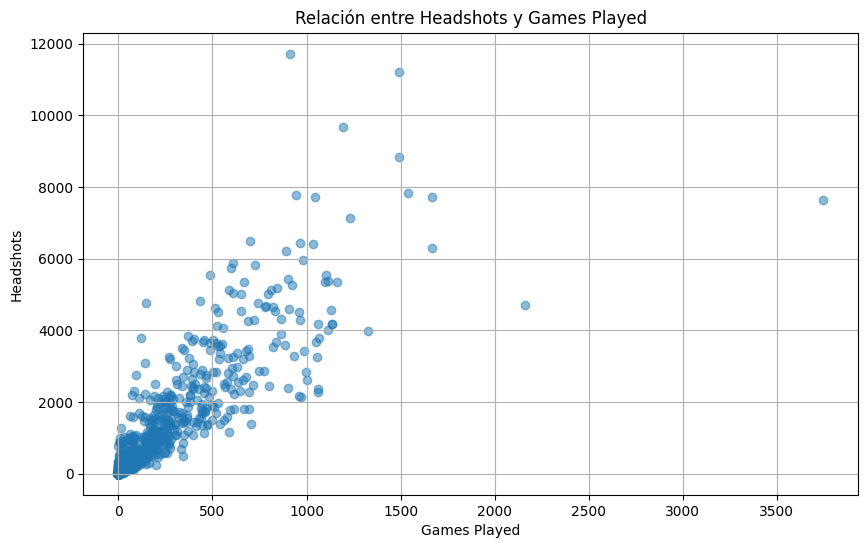

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualización de la relación entre tiros en la cabeza y partidas jugadas
plt.figure(figsize=(10, 6))
plt.scatter(data['gamesPlayed'], data['headshots'], alpha=0.5)
plt.title('Relación entre Headshots y Games Played')
plt.xlabel('Games Played')
plt.ylabel('Headshots')
plt.grid(True)
plt.show()


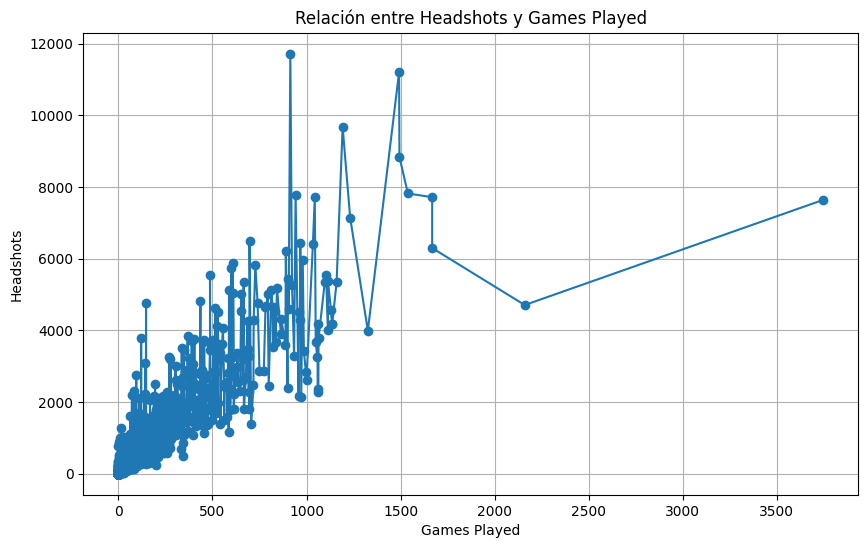

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_csv('data.csv')

# Ordenar el DataFrame por la columna 'gamesPlayed'
data_sorted = data.sort_values('gamesPlayed')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['gamesPlayed'], data_sorted['headshots'], marker='o', linestyle='-')
plt.title('Relación entre Headshots y Games Played')
plt.xlabel('Games Played')
plt.ylabel('Headshots')
plt.grid(True)
plt.show()


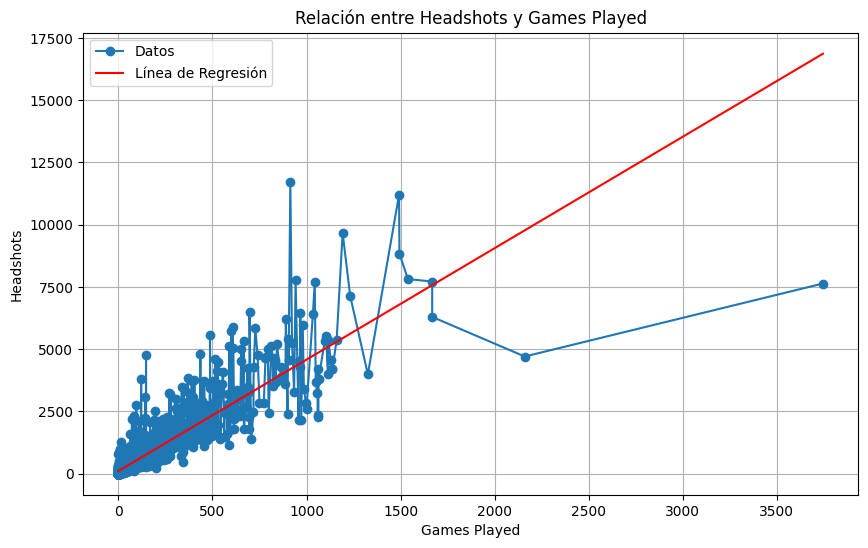

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ordenar el DataFrame por la columna 'gamesPlayed'
data_sorted = data.sort_values('gamesPlayed')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['gamesPlayed'], data_sorted['headshots'], marker='o', linestyle='-', label='Datos')

# Calcular la línea de regresión usando numpy.polyfit() para ajuste lineal
coefficients = np.polyfit(data_sorted['gamesPlayed'], data_sorted['headshots'], 1)
polynomial = np.poly1d(coefficients)
plt.plot(data_sorted['gamesPlayed'], polynomial(data_sorted['gamesPlayed']), label='Línea de Regresión', color='red')

plt.title('Relación entre Headshots y Games Played')
plt.xlabel('Games Played')
plt.ylabel('Headshots')
plt.legend()
plt.grid(True)
plt.show()


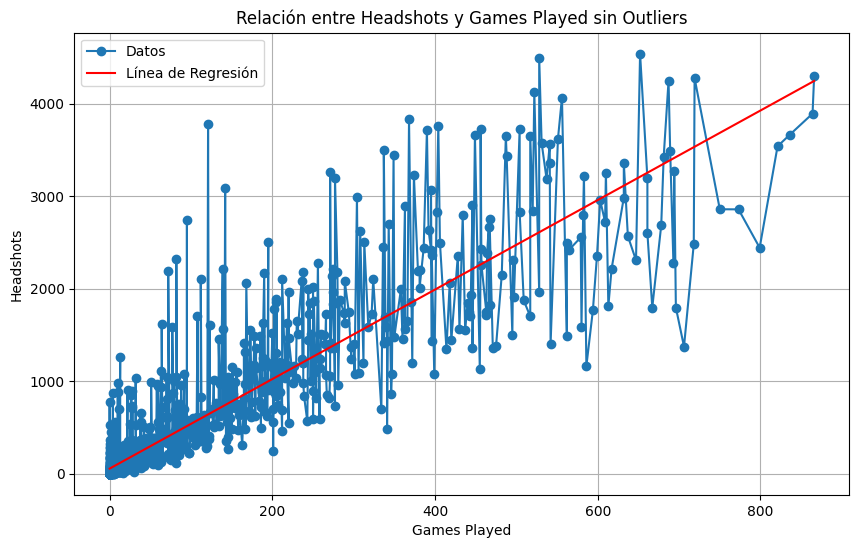

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore


# Calcular los z-scores para las columnas 'gamesPlayed' y 'headshots'
data['gamesPlayed_zscore'] = zscore(data['gamesPlayed'])
data['headshots_zscore'] = zscore(data['headshots'])

# Filtrar los valores atípicos basados en el criterio del z-score
data_filtered = data[(np.abs(data['gamesPlayed_zscore']) < 3) & (np.abs(data['headshots_zscore']) < 3)]

# Ordenar el DataFrame filtrado por la columna 'gamesPlayed'
data_sorted = data_filtered.sort_values('gamesPlayed')

# Crear el gráfico de líneas con la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['gamesPlayed'], data_sorted['headshots'], marker='o', linestyle='-', label='Datos')

# Calcular la línea de regresión para los datos filtrados
coefficients = np.polyfit(data_sorted['gamesPlayed'], data_sorted['headshots'], 1)
polynomial = np.poly1d(coefficients)
plt.plot(data_sorted['gamesPlayed'], polynomial(data_sorted['gamesPlayed']), label='Línea de Regresión', color='red')

plt.title('Relación entre Headshots y Games Played sin Outliers')
plt.xlabel('Games Played')
plt.ylabel('Headshots')
plt.legend()
plt.grid(True)
plt.show()


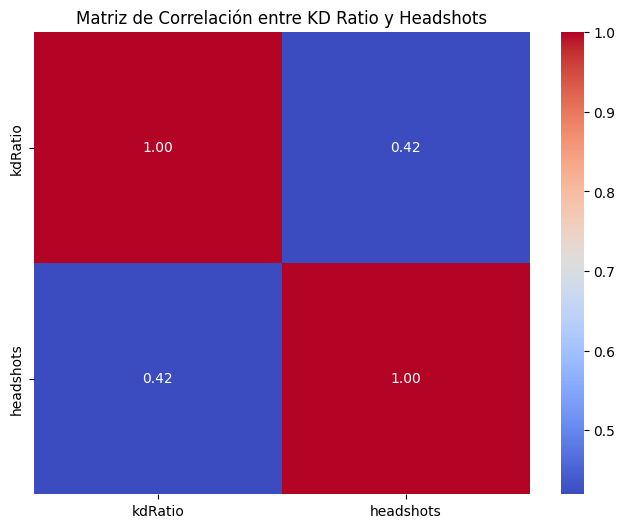

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes para el análisis de correlación
selected_columns = ['kdRatio', 'headshots']
subset_data = data[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = subset_data.corr()

# Visualizar la matriz de correlación como un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre KD Ratio y Headshots')
plt.show()


Correlación entre KD Ratio y Headshots

Podemos ver que existe una relación pero no una relación perfecta. Una relación de 0,42 evidencia una hay una tendencia de aumento conjunto entre ambas variables, pero no una relación perfectamente lineal o fuerte.

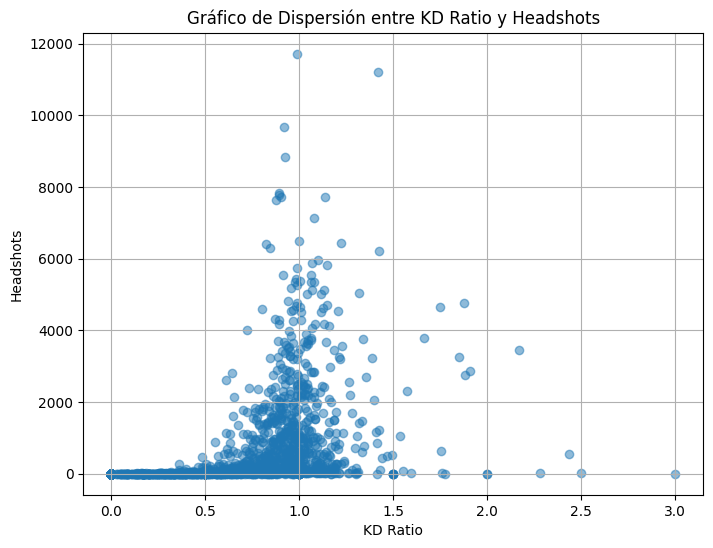

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Seleccionar las columnas relevantes para el análisis de dispersión
selected_columns = ['kdRatio', 'headshots']
subset_data = data[selected_columns]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(subset_data['kdRatio'], subset_data['headshots'], alpha=0.5)
plt.title('Gráfico de Dispersión entre KD Ratio y Headshots')
plt.xlabel('KD Ratio')
plt.ylabel('Headshots')
plt.grid(True)
plt.show()


 A medida que el KD Ratio se acerca a 1, los headshots tienden a aumentar. Esta tendencia sugiere que hay una relación positiva entre el KD Ratio y los headshots: a medida que el KD Ratio aumenta (incluso cerca del valor 1), los headshots tienden a ser más altos en promedio.

# CONCLUSIONES

Hay una tendencia clara entre el nivel,las partidas jugadas y los tiros en la cabeza. Sin embargo, podemos ver como la tendencia indica que ante una cantidad de partidas juagadas determinada ya no aumenta el número de disparos en la cabeza solamente en función de las partidas jugadas si no que va a depender de tu nivel y tu habilidad como podemos ver por la relación d headshots y la proporción entre el número de eliminaciones que un jugador logra y el número de veces que ese jugador es eliminado.